In [1]:
import pandas as pd
import h5py
%matplotlib inline

In [2]:
import glob
import os

In [6]:
store = pd.HDFStore("../data/MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5")
df = store.select("/analysis/songs")

In [7]:
df[:2]

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,a600d65cf157a306be60f26ecbf218f4,0,280.21506,0.238,0,0,0,0,0,...,5,0.555,-3.306,1,0.50,275.528,173.205,5,0.12,TRACCVZ128F4291A8A
1,22050,c64d75b0588e5ab552ee94548b50a4fa,0,191.68608,0.000,0,0,0,0,0,...,0,0.501,-10.764,1,0.71,184.128,150.955,4,0.60,TRACCMH128F428E4CD


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
analysis_sample_rate              10000 non-null int32
audio_md5                         10000 non-null object
danceability                      10000 non-null float64
duration                          10000 non-null float64
end_of_fade_in                    10000 non-null float64
energy                            10000 non-null float64
idx_bars_confidence               10000 non-null int32
idx_bars_start                    10000 non-null int32
idx_beats_confidence              10000 non-null int32
idx_beats_start                   10000 non-null int32
idx_sections_confidence           10000 non-null int32
idx_sections_start                10000 non-null int32
idx_segments_confidence           10000 non-null int32
idx_segments_loudness_max         10000 non-null int32
idx_segments_loudness_max_time    10000 non-null int32
idx_segments_loudness_start       10000 non-null int32
idx

In [9]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: ../data/MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5
/analysis/songs               frame_table [0.0.0] (typ->generic,nrows->10000,ncols->31,indexers->[index],dc->[analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,idx_sections_start,idx_segments_confidence,idx_segments_loudness_max,idx_segments_loudness_max_time,idx_segments_loudness_start,idx_segments_pitches,idx_segments_start,idx_segments_timbre,idx_tatums_confidence,idx_tatums_start,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id])
/metadata/songs               frame_table [0.0.0] (typ->generic,nrows->10000,ncols->20,indexers->[index],dc->[analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_m

In [10]:
metadata_df = store.select("/metadata/songs")
metadata_df[:2]

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
0,,29785,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,-1,,0,0,Call of the Mastodon,223563,0.597641,SOVLGJY12A8C13FBED,Deep Sea Creature,2442524
1,,167867,0.561590,0.420570,AR2PT4M1187FB55B1A,NaN,,NaN,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,1880,,0,0,Adelante,221677,NaN,SOGDQZK12A8C13F37C,No Quieras Marcharte,2423472


In [11]:
# Get the analysis dataset first 2 rows
df[:2]

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,a600d65cf157a306be60f26ecbf218f4,0,280.21506,0.238,0,0,0,0,0,...,5,0.555,-3.306,1,0.50,275.528,173.205,5,0.12,TRACCVZ128F4291A8A
1,22050,c64d75b0588e5ab552ee94548b50a4fa,0,191.68608,0.000,0,0,0,0,0,...,0,0.501,-10.764,1,0.71,184.128,150.955,4,0.60,TRACCMH128F428E4CD


In [15]:
del df["analysis_sample_rate"]

In [16]:
df[:2]

,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,a600d65cf157a306be60f26ecbf218f4,0,280.21506,0.238,0,0,0,0,0,0,...,5,0.555,-3.306,1,0.50,275.528,173.205,5,0.12,TRACCVZ128F4291A8A
1,c64d75b0588e5ab552ee94548b50a4fa,0,191.68608,0.000,0,0,0,0,0,0,...,0,0.501,-10.764,1,0.71,184.128,150.955,4,0.60,TRACCMH128F428E4CD


In [18]:
del df["audio_md5"]

In [20]:
df["danceability"].min()

0.0

In [21]:
df["danceability"].max()

0.0

In [22]:
del df["danceability"]

In [24]:
df["end_of_fade_in"].max()

43.119

In [25]:
df.columns

Index(['duration', 'end_of_fade_in', 'energy', 'idx_bars_confidence',
       'idx_bars_start', 'idx_beats_confidence', 'idx_beats_start',
       'idx_sections_confidence', 'idx_sections_start',
       'idx_segments_confidence', 'idx_segments_loudness_max',
       'idx_segments_loudness_max_time', 'idx_segments_loudness_start',
       'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre',
       'idx_tatums_confidence', 'idx_tatums_start', 'key', 'key_confidence',
       'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence', 'track_id'],
      dtype='object')

In [26]:
for i in df.columns:
    print("{0}: min = {1}, max = {2}".format(i, df[i].min(), df[i].max()))

duration: min = 1.04444, max = 1819.76771
end_of_fade_in: min = 0.0, max = 43.119
energy: min = 0.0, max = 0.0
idx_bars_confidence: min = 0, max = 0
idx_bars_start: min = 0, max = 0
idx_beats_confidence: min = 0, max = 0
idx_beats_start: min = 0, max = 0
idx_sections_confidence: min = 0, max = 0
idx_sections_start: min = 0, max = 0
idx_segments_confidence: min = 0, max = 0
idx_segments_loudness_max: min = 0, max = 0
idx_segments_loudness_max_time: min = 0, max = 0
idx_segments_loudness_start: min = 0, max = 0
idx_segments_pitches: min = 0, max = 0
idx_segments_start: min = 0, max = 0
idx_segments_timbre: min = 0, max = 0
idx_tatums_confidence: min = 0, max = 0
idx_tatums_start: min = 0, max = 0
key: min = 0, max = 11
key_confidence: min = 0.0, max = 1.0
loudness: min = -51.643, max = 0.566
mode: min = 0, max = 1
mode_confidence: min = 0.0, max = 1.0
start_of_fade_out: min = 1.044, max = 1813.426
tempo: min = 0.0, max = 262.828
time_signature: min = 0, max = 7
time_signature_confidence:

In [29]:
droppable_cols = [i for i in df.columns if i.startswith("idx")]
for i in droppable_cols:
    del df[i]

In [31]:
df[:2]

,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,280.21506,0.238,0,5,0.555,-3.306,1,0.50,275.528,173.205,5,0.12,TRACCVZ128F4291A8A
1,191.68608,0.000,0,0,0.501,-10.764,1,0.71,184.128,150.955,4,0.60,TRACCMH128F428E4CD


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
energy                       10000 non-null float64
key                          10000 non-null int32
key_confidence               10000 non-null float64
loudness                     10000 non-null float64
mode                         10000 non-null int32
mode_confidence              10000 non-null float64
start_of_fade_out            10000 non-null float64
tempo                        10000 non-null float64
time_signature               10000 non-null int32
time_signature_confidence    10000 non-null float64
track_id                     10000 non-null object
dtypes: float64(9), int32(3), object(1)
memory usage: 976.6+ KB


In [33]:
del df["energy"]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
key                          10000 non-null int32
key_confidence               10000 non-null float64
loudness                     10000 non-null float64
mode                         10000 non-null int32
mode_confidence              10000 non-null float64
start_of_fade_out            10000 non-null float64
tempo                        10000 non-null float64
time_signature               10000 non-null int32
time_signature_confidence    10000 non-null float64
track_id                     10000 non-null object
dtypes: float64(8), int32(3), object(1)
memory usage: 898.4+ KB


In [35]:
df[:2]

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,280.21506,0.238,5,0.555,-3.306,1,0.50,275.528,173.205,5,0.12,TRACCVZ128F4291A8A
1,191.68608,0.000,0,0.501,-10.764,1,0.71,184.128,150.955,4,0.60,TRACCMH128F428E4CD


In [36]:
for i in df.columns:
    print("{0}: min = {1}, max = {2}".format(i, df[i].min(), df[i].max()))

duration: min = 1.04444, max = 1819.76771
end_of_fade_in: min = 0.0, max = 43.119
key: min = 0, max = 11
key_confidence: min = 0.0, max = 1.0
loudness: min = -51.643, max = 0.566
mode: min = 0, max = 1
mode_confidence: min = 0.0, max = 1.0
start_of_fade_out: min = 1.044, max = 1813.426
tempo: min = 0.0, max = 262.828
time_signature: min = 0, max = 7
time_signature_confidence: min = 0.0, max = 1.0
track_id: min = TRAAAAW128F429D538, max = TRBIJYB128F14AE326


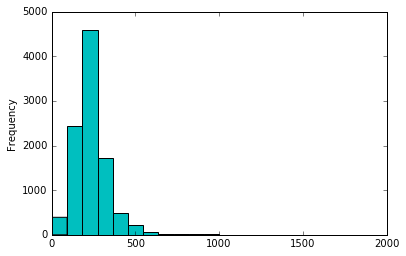

In [39]:
df["duration"].plot(kind="hist", bins=20, color="c")

In [40]:
df[df.duration == df["duration"].max()]

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
9817,1819.76771,2.386,2,0.601,-14.402,1,0.475,1813.426,134.531,4,0.493,TRBGBIZ12903CB26BA


In [43]:
metadata_df[9817:9818]

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
9817,,16919,0.68113,0.453399,AROATPL1187FB48E12,34.16788,Arizona,-111.9307,f6b037df-35e8-4ef5-b59c-5634de1b44d4,UFO,32564,,0,0,"Parker's Birthday ""Live in Texas",666530,NaN,SOKKDSX12AB018866A,Electric Phase / Hot 'n' Ready / Pack It Up 'n...,7388605


Loudness seems to be redundant given its scale, so we'll remove that too

In [44]:
del df["loudness"]

The `mode` field describes whether it's in major or minor, so we can remove that

In [45]:
del df["mode"]

In [46]:
for i in df.columns:
    print("{0}: min = {1}, max = {2}".format(i, df[i].min(), df[i].max()))

duration: min = 1.04444, max = 1819.76771
end_of_fade_in: min = 0.0, max = 43.119
key: min = 0, max = 11
key_confidence: min = 0.0, max = 1.0
mode_confidence: min = 0.0, max = 1.0
start_of_fade_out: min = 1.044, max = 1813.426
tempo: min = 0.0, max = 262.828
time_signature: min = 0, max = 7
time_signature_confidence: min = 0.0, max = 1.0
track_id: min = TRAAAAW128F429D538, max = TRBIJYB128F14AE326


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
key                          10000 non-null int32
key_confidence               10000 non-null float64
mode_confidence              10000 non-null float64
start_of_fade_out            10000 non-null float64
tempo                        10000 non-null float64
time_signature               10000 non-null int32
time_signature_confidence    10000 non-null float64
track_id                     10000 non-null object
dtypes: float64(7), int32(2), object(1)
memory usage: 781.2+ KB


In [48]:
metadata_df[:2]

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
0,,29785,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,-1,,0,0,Call of the Mastodon,223563,0.597641,SOVLGJY12A8C13FBED,Deep Sea Creature,2442524
1,,167867,0.561590,0.420570,AR2PT4M1187FB55B1A,NaN,,NaN,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,1880,,0,0,Adelante,221677,NaN,SOGDQZK12A8C13F37C,No Quieras Marcharte,2423472


Remove attributes for which all values aren't known

In [50]:
del metadata_df["analyzer_version"]
del metadata_df["artist_latitude"]
del metadata_df["artist_location"]
del metadata_df["artist_longitude"]

In [51]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
artist_7digitalid      10000 non-null int32
artist_familiarity     9996 non-null float64
artist_hotttnesss      10000 non-null float64
artist_id              10000 non-null object
artist_mbid            10000 non-null object
artist_name            10000 non-null object
artist_playmeid        10000 non-null int32
genre                  10000 non-null object
idx_artist_terms       10000 non-null int32
idx_similar_artists    10000 non-null int32
release                10000 non-null object
release_7digitalid     10000 non-null int32
song_hotttnesss        5648 non-null float64
song_id                10000 non-null object
title                  10000 non-null object
track_7digitalid       10000 non-null int32
dtypes: float64(3), int32(6), object(7)
memory usage: 1.1+ MB


In [52]:
for i in metadata_df.columns:
    print("{0}: min = {1}, max = {2}".format(i, metadata_df[i].min(), metadata_df[i].max()))

artist_7digitalid: min = -1, max = 809205
artist_familiarity: min = 0.0, max = 1.0
artist_hotttnesss: min = 0.0, max = 1.0825025567261237
artist_id: min = AR009211187B989185, max = ARZZRK91187B9A5CA5
artist_mbid: min = , max = ffb2d3e3-a4cc-48cf-8fb0-f2f846e9d7b9
artist_name: min = !!!, max = Étienne Daho
artist_playmeid: min = -1, max = 242965
genre: min = , max = 
idx_artist_terms: min = 0, max = 0
idx_similar_artists: min = 0, max = 0
release: min =  Lazy Afternoon En Anglais, max = Überfall
release_7digitalid: min = 63, max = 823599
song_hotttnesss: min = 0.0, max = 1.0
song_id: min = SOAAAQN12AB01856D3, max = SOZZWWW12A58A8146A
title: min = , max = Último Desejo
track_7digitalid: min = 845, max = 9090443


In [54]:
# We don't need the ID on 7digital.com
del metadata_df["artist_7digitalid"]

In [55]:
# artist_mbid has some null values, so remove the field
del metadata_df["artist_mbid"]

In [56]:
del metadata_df["artist_name"]
del metadata_df["artist_playmeid"]
del metadata_df["genre"]
del metadata_df["idx_artist_terms"]
del metadata_df["idx_similar_artists"]
del metadata_df["track_7digitalid"]

In [57]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
artist_familiarity    9996 non-null float64
artist_hotttnesss     10000 non-null float64
artist_id             10000 non-null object
release               10000 non-null object
release_7digitalid    10000 non-null int32
song_hotttnesss       5648 non-null float64
song_id               10000 non-null object
title                 10000 non-null object
dtypes: float64(3), int32(1), object(4)
memory usage: 664.1+ KB


In [58]:
for i in metadata_df.columns:
    print("{0}: min = {1}, max = {2}".format(i, metadata_df[i].min(), metadata_df[i].max()))

artist_familiarity: min = 0.0, max = 1.0
artist_hotttnesss: min = 0.0, max = 1.0825025567261237
artist_id: min = AR009211187B989185, max = ARZZRK91187B9A5CA5
release: min =  Lazy Afternoon En Anglais, max = Überfall
release_7digitalid: min = 63, max = 823599
song_hotttnesss: min = 0.0, max = 1.0
song_id: min = SOAAAQN12AB01856D3, max = SOZZWWW12A58A8146A
title: min = , max = Último Desejo


`title` has some null values, remove those as well

In [59]:
del metadata_df["title"]

In [60]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
artist_familiarity    9996 non-null float64
artist_hotttnesss     10000 non-null float64
artist_id             10000 non-null object
release               10000 non-null object
release_7digitalid    10000 non-null int32
song_hotttnesss       5648 non-null float64
song_id               10000 non-null object
dtypes: float64(3), int32(1), object(3)
memory usage: 585.9+ KB


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
key                          10000 non-null int32
key_confidence               10000 non-null float64
mode_confidence              10000 non-null float64
start_of_fade_out            10000 non-null float64
tempo                        10000 non-null float64
time_signature               10000 non-null int32
time_signature_confidence    10000 non-null float64
track_id                     10000 non-null object
dtypes: float64(7), int32(2), object(1)
memory usage: 781.2+ KB


Since around half of the `song_hotttnesss` values are null, we can remove them (yay!)

In [63]:
del metadata_df["song_hotttnesss"]

We impute the `artist_familiarity` with the mean.

In [68]:
metadata_df["artist_familiarity"].fillna(metadata_df["artist_familiarity"].mean(), inplace=True)

In [69]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
artist_familiarity    10000 non-null float64
artist_hotttnesss     10000 non-null float64
artist_id             10000 non-null object
release               10000 non-null object
release_7digitalid    10000 non-null int32
song_id               10000 non-null object
dtypes: float64(2), int32(1), object(3)
memory usage: 507.8+ KB


In [70]:
for i in metadata_df.columns:
    print("{0}: min = {1}, max = {2}".format(i, metadata_df[i].min(), metadata_df[i].max()))

artist_familiarity: min = 0.0, max = 1.0
artist_hotttnesss: min = 0.0, max = 1.0825025567261237
artist_id: min = AR009211187B989185, max = ARZZRK91187B9A5CA5
release: min =  Lazy Afternoon En Anglais, max = Überfall
release_7digitalid: min = 63, max = 823599
song_id: min = SOAAAQN12AB01856D3, max = SOZZWWW12A58A8146A


In [71]:
del metadata_df["release"]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
key                          10000 non-null int32
key_confidence               10000 non-null float64
mode_confidence              10000 non-null float64
start_of_fade_out            10000 non-null float64
tempo                        10000 non-null float64
time_signature               10000 non-null int32
time_signature_confidence    10000 non-null float64
track_id                     10000 non-null object
dtypes: float64(7), int32(2), object(1)
memory usage: 781.2+ KB


In [73]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
artist_familiarity    10000 non-null float64
artist_hotttnesss     10000 non-null float64
artist_id             10000 non-null object
release_7digitalid    10000 non-null int32
song_id               10000 non-null object
dtypes: float64(2), int32(1), object(2)
memory usage: 429.7+ KB


In [74]:
del metadata_df["release_7digitalid"]